In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow
from tensorflow import keras
from tensorflow.keras.utils import to_categorical  # Use to_categorical instead of np_utils
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from sklearn.metrics import accuracy_score
from tensorflow.keras import backend as K

In [2]:
''' reading fashion mnist data from tensorflow '''
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [3]:
print("Shape of X_train:",X_train.shape)
print("Shape of y_train:",X_test.shape)

Shape of X_train: (60000, 28, 28)
Shape of y_train: (10000, 28, 28)


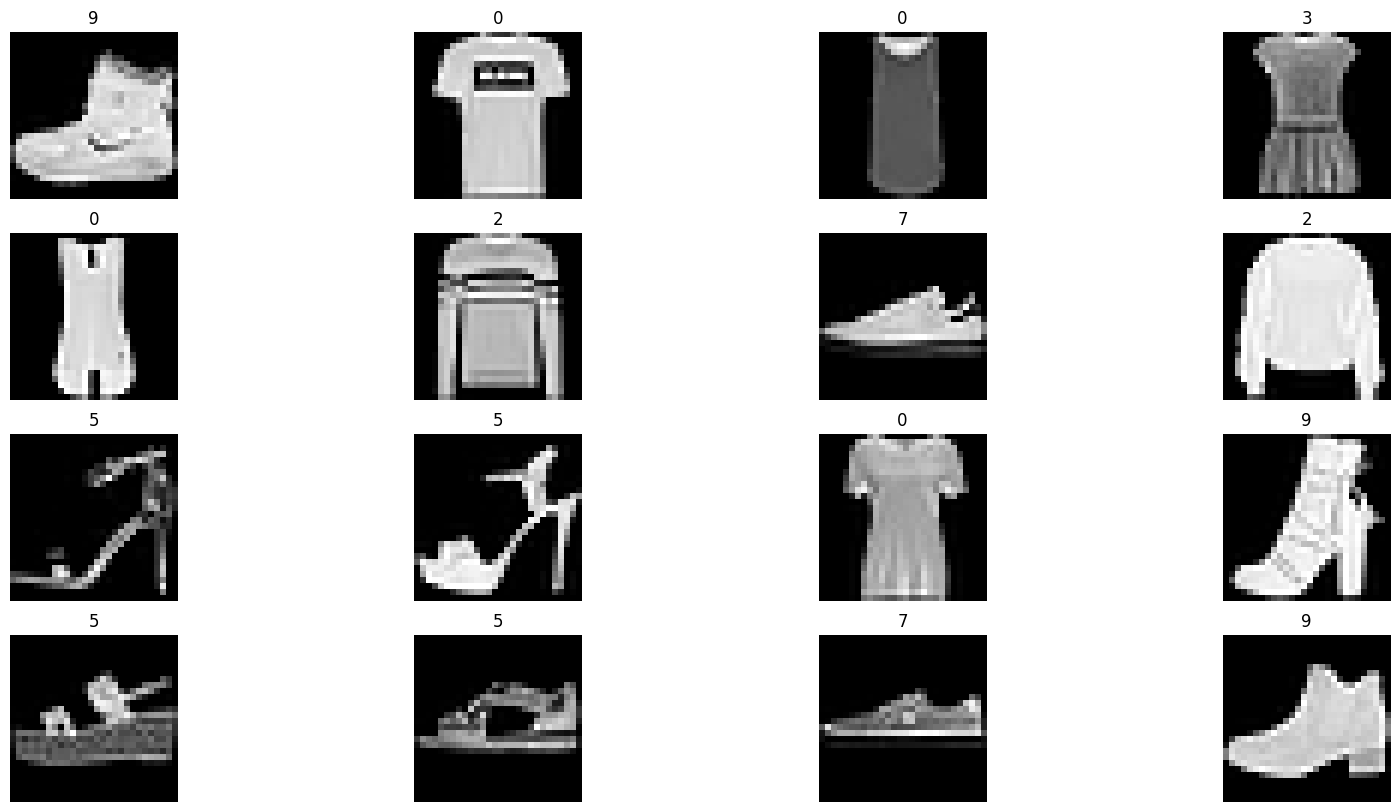

In [4]:
''' plotting some images '''
plt.figure(figsize=(20, 10))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.axis('off')
    plt.imshow(X_train[i], cmap='gray')
    plt.title(y_train[i])

plt.show()

In [5]:
''' preprocessing steps '''

''' number of rows and columns '''
rows = X_train[0].shape[0]
cols = X_train[1].shape[0]


''' reshaping X_train and X_test '''
X_train = X_train.reshape(X_train.shape[0], rows, cols, 1)
X_test = X_test.reshape(X_test.shape[0],rows, cols, 1)

'''Storing the shape of a single image '''
inp_shape = (rows, cols, 1)

''' changing data type '''
X_train = X_train.astype('float32')
X_test =  X_test.astype('float32')

'''  rescaling '''
X_train = X_train / 255
X_test = X_test /255

''' converting labels into to_categorical '''
# Use to_categorical directly since it's already imported
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


''' Number of classes '''
num_cls = y_test.shape[1]
num_pix = X_train.shape[1] * X_train.shape[2]



In [6]:
num_cls

10

In [7]:
''' Model '''

''' container '''
model = Sequential()

''' Convolutional Layer '''
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=inp_shape))
model.add(BatchNormalization())

''' MaxPooling Layer '''
model.add(MaxPooling2D(pool_size=(2, 2)))

''' Dropout '''
model.add(Dropout(0.25))
model.add(Flatten())

''' Hidden Layers '''
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())

model.add(Dropout(0.5))

''' Classification Layer '''
model.add(Dense(num_cls, activation='softmax'))





/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
''' Compile the model '''
model.compile(loss= 'categorical_crossentropy', optimizer=keras.optimizers.Adadelta(), metrics = ['accuracy'])

In [9]:
''' lets see how model looks like '''
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 26, 26, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 5408)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         692,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 694,602 (2.65 MB)

 Trainable params: 694,282 (2.65 MB)

 Non-trainable params: 320 (1.25 KB)

In [10]:
''' training '''
batch_size = 128
epochs = 100

history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test, y_test))

Epoch 1/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 11ms/step - accuracy: 0.1713 - loss: 3.0642 - val_accuracy: 0.4489 - val_loss: 1.6176
Epoch 2/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3598 - loss: 2.0120 - val_accuracy: 0.6303 - val_loss: 1.0522
Epoch 3/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4717 - loss: 1.5966 - val_accuracy: 0.6848 - val_loss: 0.8944
Epoch 4/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5415 - loss: 1.3735 - val_accuracy: 0.7113 - val_loss: 0.8071
Epoch 5/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5884 - loss: 1.2300 - val_accuracy: 0.7287 - val_loss: 0.7501
Epoch 6/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6207 - loss: 1.1307 - val_accuracy: 0.7436 - val_loss: 0.7104
Epoch 7/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6382 - loss: 1.0622 - val_accuracy: 0.7568 - val_loss: 0.6783
Epoch 8/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6625 - loss: 1.0017 - val_ac

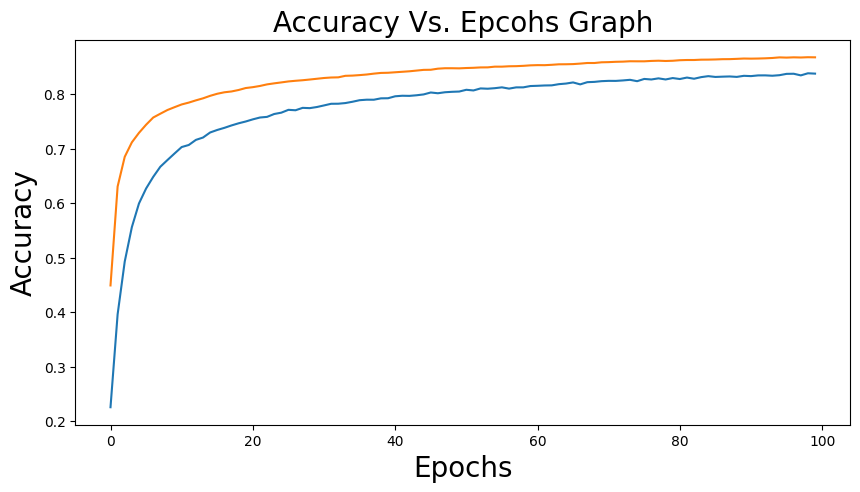

In [11]:
''' training accuracy and validation accuracy graph '''

plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epochs', fontsize=20)
plt.ylabel('Accuracy', fontsize=20)
plt.title("Accuracy Vs. Epcohs Graph", fontsize=20);

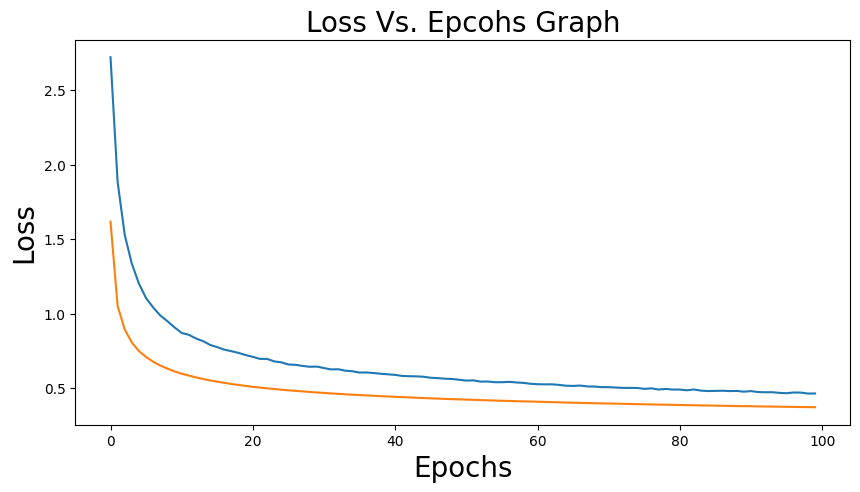

In [12]:
''' training loss and validation loss graph '''

plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Accuracy')
plt.plot(history.history['val_loss'], label='Val Accuracy')
plt.xlabel('Epochs', fontsize=20)
plt.ylabel('Loss', fontsize=20)
plt.title("Loss Vs. Epcohs Graph", fontsize=20);

In [13]:
''' prediction '''
pred = model.predict(X_test)
pred = np.argmax(pred, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step


In [14]:
''' resizing y_test '''
test = []
for x in y_test:
  if 1 in x:
    x = list(x)
    test.append(x.index(1))

In [15]:
y_test = np.array(test)

In [16]:
print("Accuracy Score: ", accuracy_score(y_test, pred))

Accuracy Score:  0.8672
